In [20]:
import numpy as np

import pandas as pd

import seaborn as sns

In [21]:
# 데이터 로드 및 확인
df = pd.read_csv("C:/Users/rudal/OneDrive/Ai/seeds_dataset.txt", header=0,names=column_names, delimiter='\s+')
column_names = ["area ", "perimeter ", "compactness ", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove", "class"]
df.head(10)
df


,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
# 결측치 확인
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
class                      0
dtype: int64

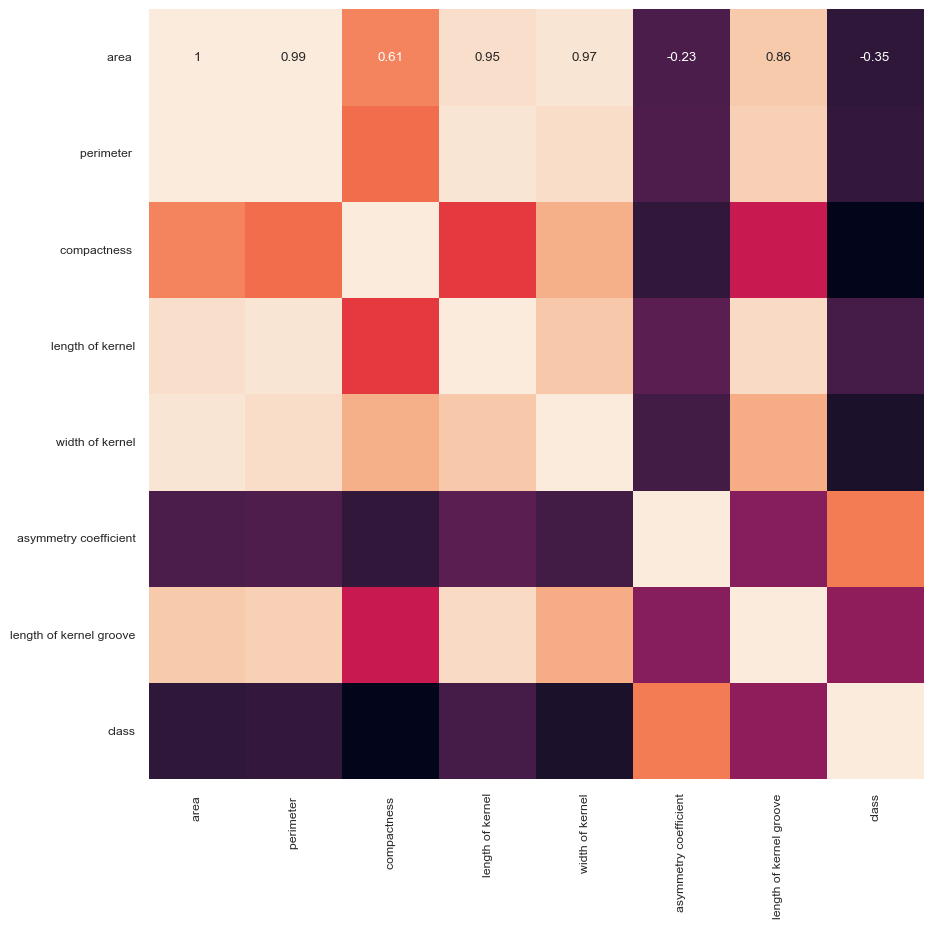

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

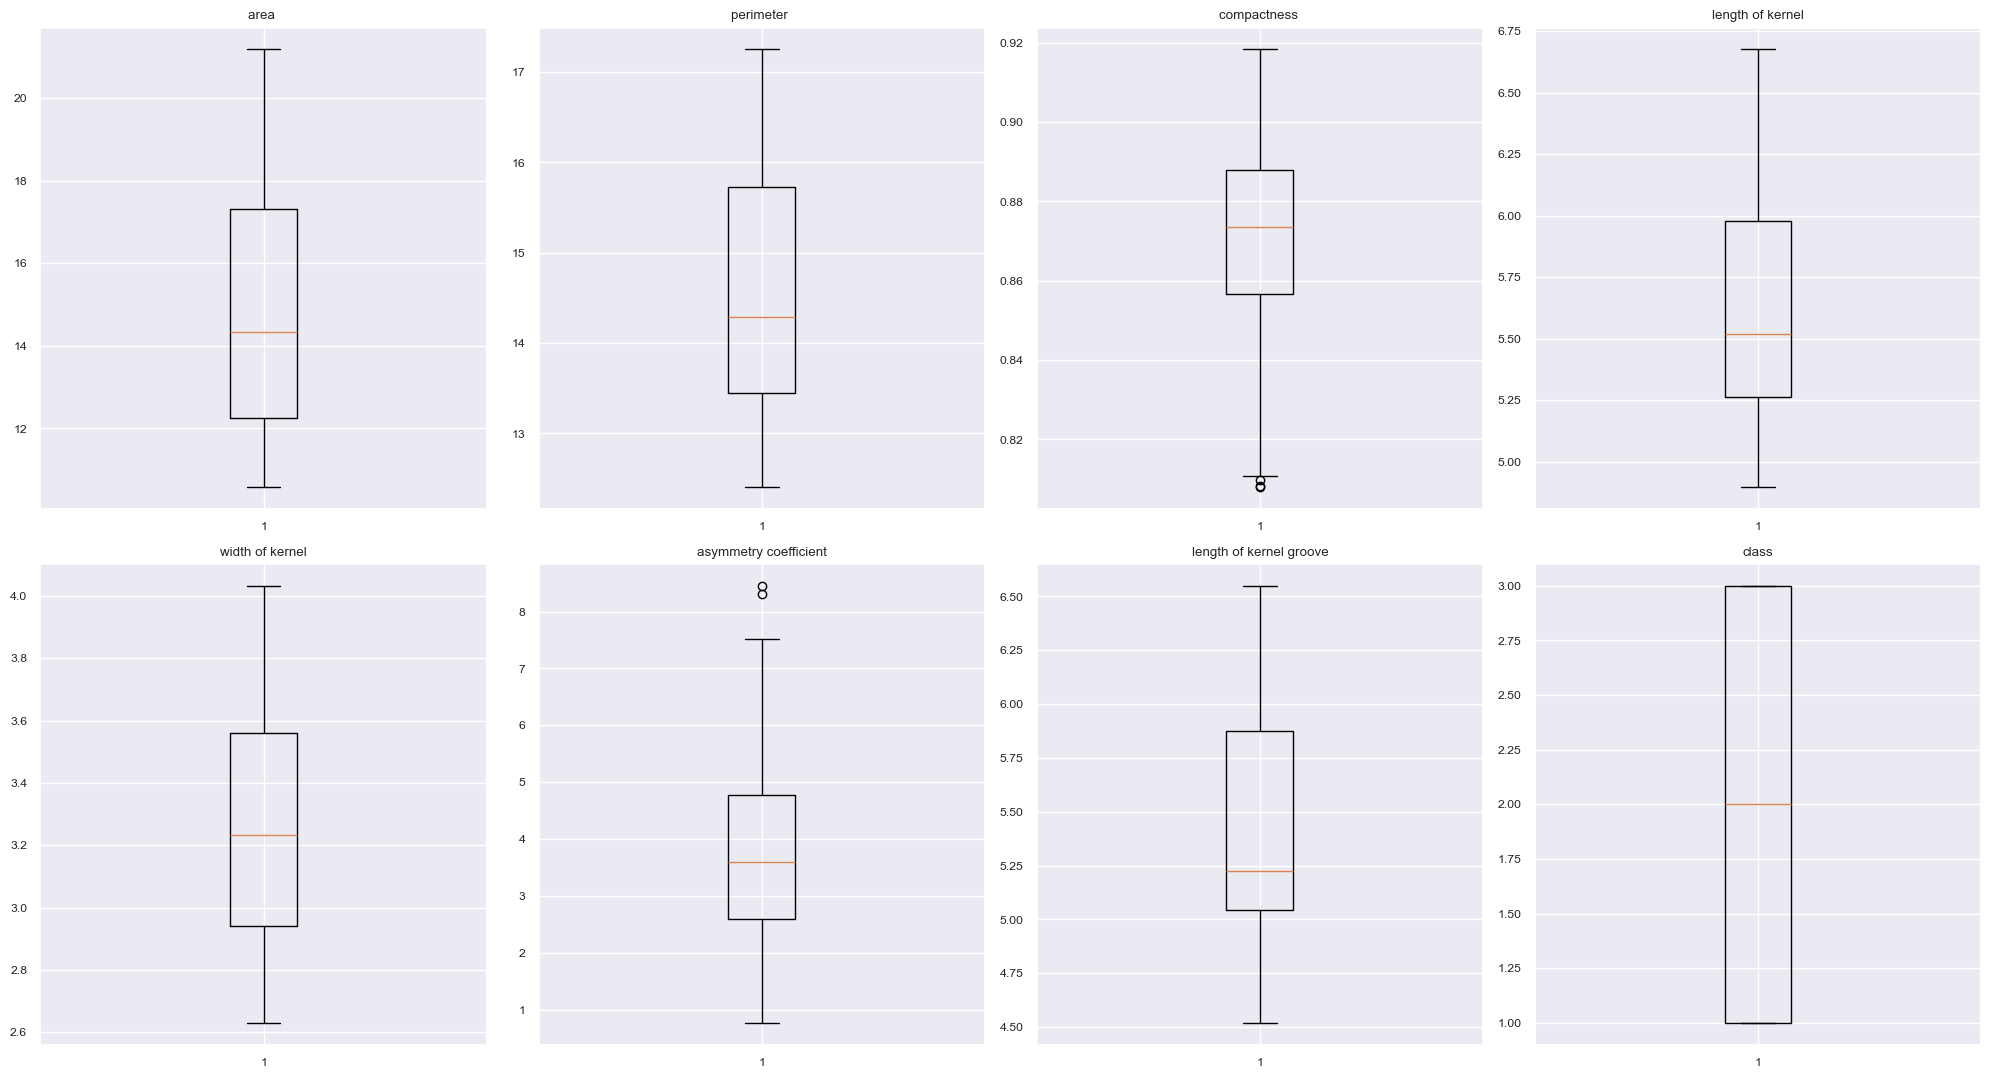

In [9]:

plt.figure(figsize=(20, 16))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

C:\Users\rudal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rudal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rudal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Label')

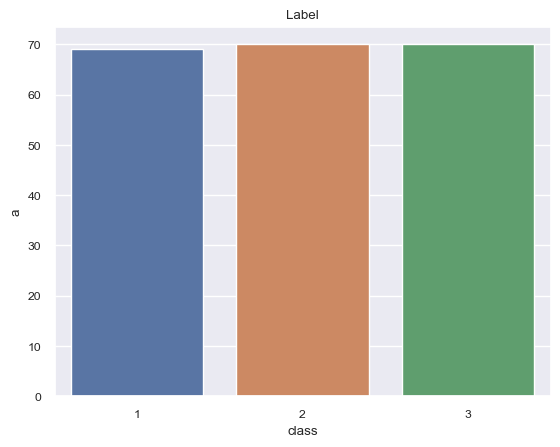

In [10]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.ylabel("a")
plt.title("Label")

In [11]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
2    70
3    70
1    69
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

# 표준화(Standardization)
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df.drop('class', axis=1))  # rings 열 제외하고 표준화
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=df.columns[:-1])  # 데이터프레임으로 변환
scaled_df_standard

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,0.011840,0.009234,0.427494,-0.166808,0.197647,-1.792787,-0.921971
1,-0.190940,-0.358353,1.438945,-0.760533,0.208238,-0.672161,-1.188607
2,-0.345602,-0.473224,1.036904,-0.686035,0.319438,-0.965484,-1.229314
3,0.444896,0.330872,1.371233,0.067974,0.803955,-1.568128,-0.476222
4,-0.160007,-0.266457,1.019976,-0.546070,0.142047,-0.830155,-0.921971
...,...,...,...,...,...,...,...
204,-0.912699,-1.039921,0.308998,-1.108190,-0.734318,-0.050850,-1.097014
205,-1.242645,-1.284979,-0.842110,-1.101418,-1.226777,0.411799,-0.826308
206,-0.565567,-0.687650,0.732199,-0.884697,-0.069763,3.071702,-0.718433
207,-1.032992,-1.032263,-0.799790,-1.022405,-1.118225,-0.072850,-0.742857


In [13]:
x=scaled_df_standard

X = x.values

X

array([[ 0.0118402 ,  0.00923364,  0.42749407, ...,  0.19764747,
        -1.79278662, -0.9219711 ],
       [-0.19093968, -0.35835326,  1.43894519, ...,  0.20823799,
        -0.67216102, -1.18860657],
       [-0.3456023 , -0.47322416,  1.03690395, ...,  0.31943844,
        -0.9654836 , -1.22931428],
       ...,
       [-0.56556692, -0.68764985,  0.73219901, ..., -0.06976315,
         3.07170181, -0.71843257],
       [-1.03299173, -1.03226257, -0.79978973, ..., -1.11822457,
        -0.07284964, -0.7428572 ],
       [-0.87489216, -0.93270779, -0.10997159, ..., -0.75285165,
         1.28643389, -0.70418488]])

In [14]:
y = df['class']

Y = pd.get_dummies(y).values

Y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(156, 7) (53, 7) (156, 3) (53, 3)


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [17]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(7,))

x1 = tf.keras.layers.Flatten()(inputs)


x2 = tf.keras.layers.Dense(64, activation='relu')(x1) 


x3 = tf.keras.layers.Dense(32, activation='relu')(x2)


outputs = tf.keras.layers.Dense(3, activation='softmax')(x3)


model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2691 (10.51 KB)
Trainable params: 2691 (10.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping() 그냥 하니까 epoch를 2번만 돌려서 매개변수 추가
early_stopping = EarlyStopping(patience=5)


model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test), callbacks = [early_stopping])
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 [==============================] - 1s 41ms/step - loss: 1.1919 - accuracy: 0.2628 - val_loss: 1.0869 - val_accuracy: 0.3396
Epoch 2/30
5/5 [==============================] - 0s 8ms/step - loss: 0.9909 - accuracy: 0.6026 - val_loss: 0.9270 - val_accuracy: 0.7736
Epoch 3/30
5/5 [==============================] - 0s 8ms/step - loss: 0.8555 - accuracy: 0.8269 - val_loss: 0.8076 - val_accuracy: 0.8302
Epoch 4/30
5/5 [==============================] - 0s 7ms/step - loss: 0.7570 - accuracy: 0.8590 - val_loss: 0.7170 - val_accuracy: 0.8302
Epoch 5/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6751 - accuracy: 0.8590 - val_loss: 0.6426 - val_accuracy: 0.8491
Epoch 6/30
5/5 [==============================] - 0s 8ms/step - loss: 0.6137 - accuracy: 0.8654 - val_loss: 0.5793 - val_accuracy: 0.8868
Epoch 7/30
5/5 [==============================] - 0s 8ms/step - loss: 0.5588 - accuracy: 0.8718 - val_loss: 0.5218 - val_accuracy: 0.8868
Epoch 8/30
5/5 [=================

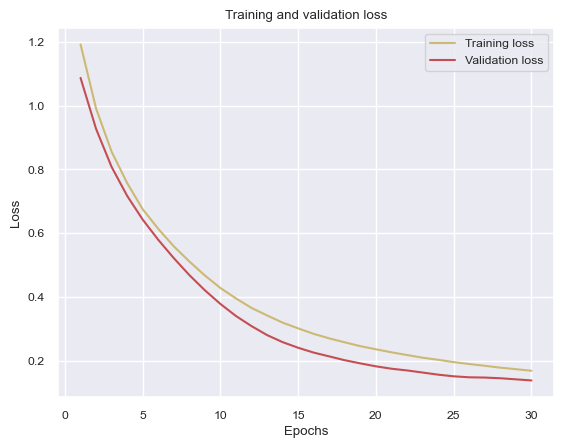

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()